In [1]:
# 주로 사용하는 코드 2 : 인식한 GPU 개수 출력
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Activation,Input,BatchNormalization,Flatten, Dense, Conv2D, MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import scipy


In [74]:
def cifar10_load_data():  
    (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = cifar10.load_data()
    
    train_validation_images = train_validation_images.reshape(-1,32,32,3)
    test_images = test_images.reshape(-1,32,32,3)
    
    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train set')
    print('Image :', train_x.shape)
    print('Label :', train_y.shape)
    print('Validation set')
    print('Image :', validation_x.shape)
    print('Label :', validation_y.shape)
    print('Train & validation set')
    print('Image :', test_x.shape)
    print('Label :', test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [75]:
train_x, train_y, validation_x, validation_y, test_x, test_y=cifar10_load_data()

model=Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same',activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.summary()


Train set
Image : (40000, 32, 32, 3)
Label : (40000, 1)
Validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Train & validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 24)        96        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 36)        7812      
_________________________________________________________________
batch_normalization_19 (Batc (None, 16, 16, 36)        144       
_________________________________________________________________


In [76]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(train_x,train_y,batch_size=64,epochs=50,verbose=2,validation_data=(validation_x,validation_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 2s - loss: 1.4661 - accuracy: 0.4751 - val_loss: 1.4720 - val_accuracy: 0.4758
Epoch 2/50
40000/40000 - 2s - loss: 1.1797 - accuracy: 0.5801 - val_loss: 1.2073 - val_accuracy: 0.5763
Epoch 3/50
40000/40000 - 2s - loss: 1.0499 - accuracy: 0.6301 - val_loss: 1.1242 - val_accuracy: 0.5875
Epoch 4/50
40000/40000 - 2s - loss: 0.9658 - accuracy: 0.6622 - val_loss: 1.2450 - val_accuracy: 0.5738
Epoch 5/50
40000/40000 - 2s - loss: 0.9025 - accuracy: 0.6845 - val_loss: 1.0686 - val_accuracy: 0.6180
Epoch 6/50
40000/40000 - 2s - loss: 0.8460 - accuracy: 0.7049 - val_loss: 1.0096 - val_accuracy: 0.6448
Epoch 7/50
40000/40000 - 2s - loss: 0.8106 - accuracy: 0.7171 - val_loss: 1.4262 - val_accuracy: 0.5343
Epoch 8/50
40000/40000 - 2s - loss: 0.7768 - accuracy: 0.7269 - val_loss: 0.9272 - val_accuracy: 0.6766
Epoch 9/50
40000/40000 - 2s - loss: 0.7476 - accuracy: 0.7370 - val_loss: 0.9408 - val_accuracy: 0.6788
Epoch 10/50
40

In [77]:
# Evaluate on the test set after training
result = model.evaluate(test_x, test_y)
print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

10000/10000 [==============================] - 0s 35us/sample - loss: 0.8751 - accuracy: 0.7212
Test loss : 0.8751	 Test accuracy : 72.12%


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


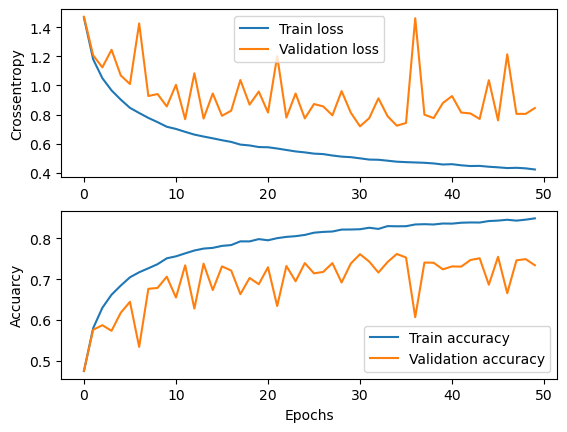

In [78]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

Probability is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


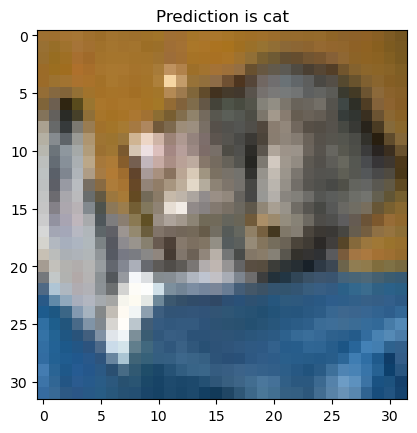

In [79]:
prediction=model.predict(test_x)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_name=classes[np.argmax(prediction[0])]
plt.imshow(test_x[0],'gray')
print('Probability is {}'.format(prediction[0].round()))#round: nearest whole num(반올림)
plt.title('Prediction is {}'.format(class_name))
plt.show()

In [80]:
#construct CAM model
# 데이터의 어느부분이 모델의 의사결정에 큰 영향을 미쳤는가 시각화하기
# input과 output 
cam_model=Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 24)        96        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 36)        7812      
_________________________________________________________________
batch_normalization_19 (Batc (None, 16, 16, 36)        144       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 36)          0   

In [81]:
features,results=cam_model.predict(test_x)
print("features shape: ",features.shape)
print("results shape: ",results.shape)

last_dense_layer=model.layers[-1]
gap_weights=last_dense_layer.get_weights()[0]
print(gap_weights.shape) #size of  weight matrix

features shape:  (10000, 8, 8, 64)
results shape:  (10000, 10)
(64, 10)


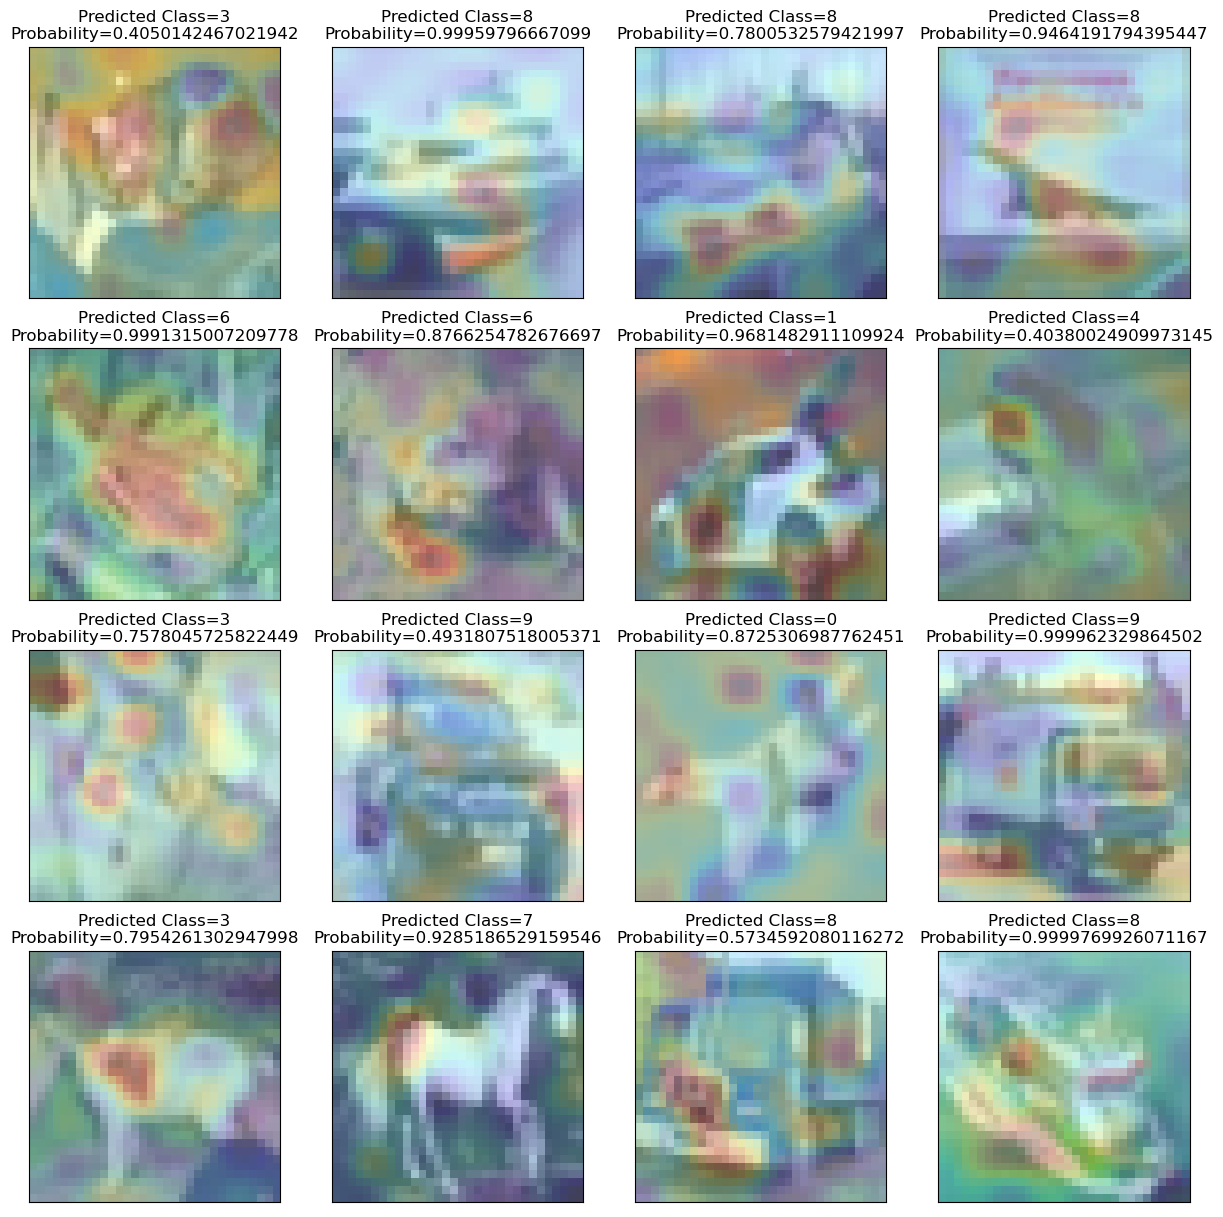

In [83]:
fig,axes=plt.subplots(4,4,figsize=(15,15))
"""
enumerate(axes.flat) is used to iterate over the 2D array of axes (subplots). 
axes.flat is a flattened version of the 2D array, so it becomes a 1D iterable.

ax_idx will contain the index of the current subplot, and ax will contain the 
reference to the subplot itself.

"""

for ax_idx, ax in enumerate(axes.flat):
    #subplot을 반복하면서(in a 2D grid) retrieve index(ax_idx) and axis(ax)
    
    features_for_img = features[ax_idx,:,:,:] 
    """By using [:, :, :, :, 0], you are selecting only the first channel (index 0) 
    of the 5D tensor. If the model output has shape (batch_size, height, width, 
    channels), the resulting shape after this indexing would be (height, width, 
    channels)."""
    #features에서 extract, 4D
    prediction=np.argmax(results[ax_idx])
    class_activation_weights= gap_weights[:,prediction]
    #gets predicted class and extract weight(last dense layer)
    class_activation_features= scipy.ndimage.zoom(features_for_img,(32/8,32/8,1),order=2)
    # order=2 > bicubic interpolation
    """For example, if features_for_img has a shape of (A, B, C), the resulting 
    class_activation_features will have a shape of (A * 28/7, B * 28/7, C * 1) 
    after the zoom operation."""
    cam_output=np.dot(class_activation_features, class_activation_weights)
    #dot product
    ax.set_title('Predicted Class={}\nProbability={}'.format(prediction,results[ax_idx,prediction]))
    ax.imshow(test_x[ax_idx],alpha=0.7)
    #display the original input image with reduced opacity 0.5
    ax.imshow(cam_output,alpha=0.2,cmap=plt.cm.jet)
    # overlay on top of the input image
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) # x,y axis 숨기기

In [62]:

for ax_idx, ax in enumerate(axes.flat):
    # subplot을 반복하면서(in a 2D grid) retrieve index(ax_idx) and axis(ax)

    features_for_img = features[ax_idx, :, :, :]
    prediction = np.argmax(results[ax_idx])
    class_activation_weights = gap_weights[:, prediction]
    # gets predicted class and extracts weight (last dense layer)
    class_activation_features = scipy.ndimage.zoom(features_for_img, (32 / 8, 32 / 8, 1), order=2)
    # order=2 > bicubic interpolation
    """For example, if features_for_img has a shape of (A, B, C), the resulting 
    class_activation_features will have a shape of (A * 28/7, B * 28/7, C * 1) 
    after the zoom operation."""
    cam_output = np.dot(class_activation_features, class_activation_weights)
    # dot product
    ax.set_title('Predicted Class={}\nProbability={}'.format(prediction, results[ax_idx, prediction]))
    
    # Display the original input image without overlay
    ax.imshow(test_x[ax_idx], alpha=0.5)

    # Create a copy of the original image for overlay
    overlay_image = np.copy(test_x[ax_idx])

    # Overlay the class activation map on top of the copied image
    overlay_image[:, :, 0] += cam_output * 0.5  # Adjust the channel you want to overlay

    # Display the overlay on top of the original input image
    ax.imshow(overlay_image, alpha=0.5)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  # x, y axis 숨기기


In [63]:
def mnist_load_data():  
    (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = mnist.load_data()
    
    train_validation_images = train_validation_images.reshape(-1,28,28,1)
    test_images = test_images.reshape(-1,28,28,1)
    
    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train set')
    print('Image :', train_x.shape)
    print('Label :', train_y.shape)
    print('Validation set')
    print('Image :', validation_x.shape)
    print('Label :', validation_y.shape)
    print('Train & validation set')
    print('Image :', test_x.shape)
    print('Label :', test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [64]:
train_x, train_y, validation_x, validation_y, test_x, test_y=mnist_load_data()

model=Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.summary()


Train set
Image : (48000, 28, 28, 1)
Label : (48000,)
Validation set
Image : (12000, 28, 28, 1)
Label : (12000,)
Train & validation set
Image : (10000, 28, 28, 1)
Label : (10000,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 24)        240       
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 24)        96        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 36)        7812      
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 36)        144       
_________________________________________________________________
max_po

In [65]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(train_x,train_y,batch_size=64,epochs=50,verbose=2,validation_data=(validation_x,validation_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 - 2s - loss: 0.3530 - accuracy: 0.9202 - val_loss: 0.1542 - val_accuracy: 0.9608
Epoch 2/50
48000/48000 - 2s - loss: 0.0901 - accuracy: 0.9752 - val_loss: 0.0766 - val_accuracy: 0.9778
Epoch 3/50
48000/48000 - 2s - loss: 0.0642 - accuracy: 0.9813 - val_loss: 0.0868 - val_accuracy: 0.9740
Epoch 4/50
48000/48000 - 2s - loss: 0.0525 - accuracy: 0.9845 - val_loss: 0.0557 - val_accuracy: 0.9839
Epoch 5/50
48000/48000 - 2s - loss: 0.0449 - accuracy: 0.9869 - val_loss: 0.0696 - val_accuracy: 0.9796
Epoch 6/50
48000/48000 - 2s - loss: 0.0422 - accuracy: 0.9873 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 7/50
48000/48000 - 2s - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0462 - val_accuracy: 0.9869
Epoch 8/50
48000/48000 - 2s - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 9/50
48000/48000 - 2s - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 10/50
48

In [66]:
# Evaluate on the test set after training
result = model.evaluate(test_x, test_y)
print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0331 - accuracy: 0.9913
Test loss : 0.0331	 Test accuracy : 99.13%


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


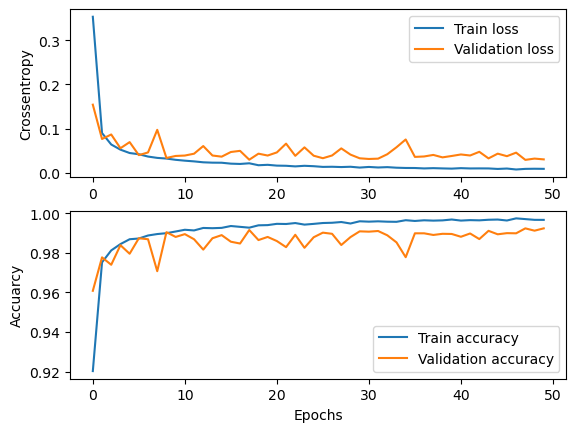

In [67]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend() #box containing description of the elements of the plot

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

Probability is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


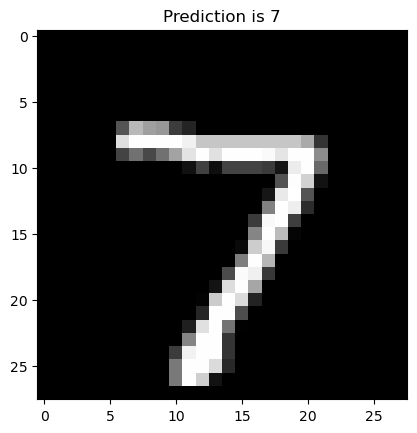

In [68]:
prediction=model.predict(test_x)
class_name=np.argmax(prediction[0])
plt.imshow(test_x[0],'gray')
print('Probability is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(class_name))
plt.show()

In [69]:
#construct CAM model
# 데이터의 어느부분이 모델의 의사결정에 큰 영향을 미쳤는가 시각화하기
# input과 output 
cam_model=Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 24)        240       
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 24)        96        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 36)        7812      
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 36)        144       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 36)          0   

In [70]:
features,results=cam_model.predict(test_x)
print("features shape: ",features.shape)
print("results shape: ",results.shape)

last_dense_layer=model.layers[-1]
gap_weights=last_dense_layer.get_weights()[0]
print(gap_weights.shape) #size of  weight matrix

features shape:  (10000, 7, 7, 64)
results shape:  (10000, 10)
(64, 10)


(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)
(28, 28)
(28, 28, 64)


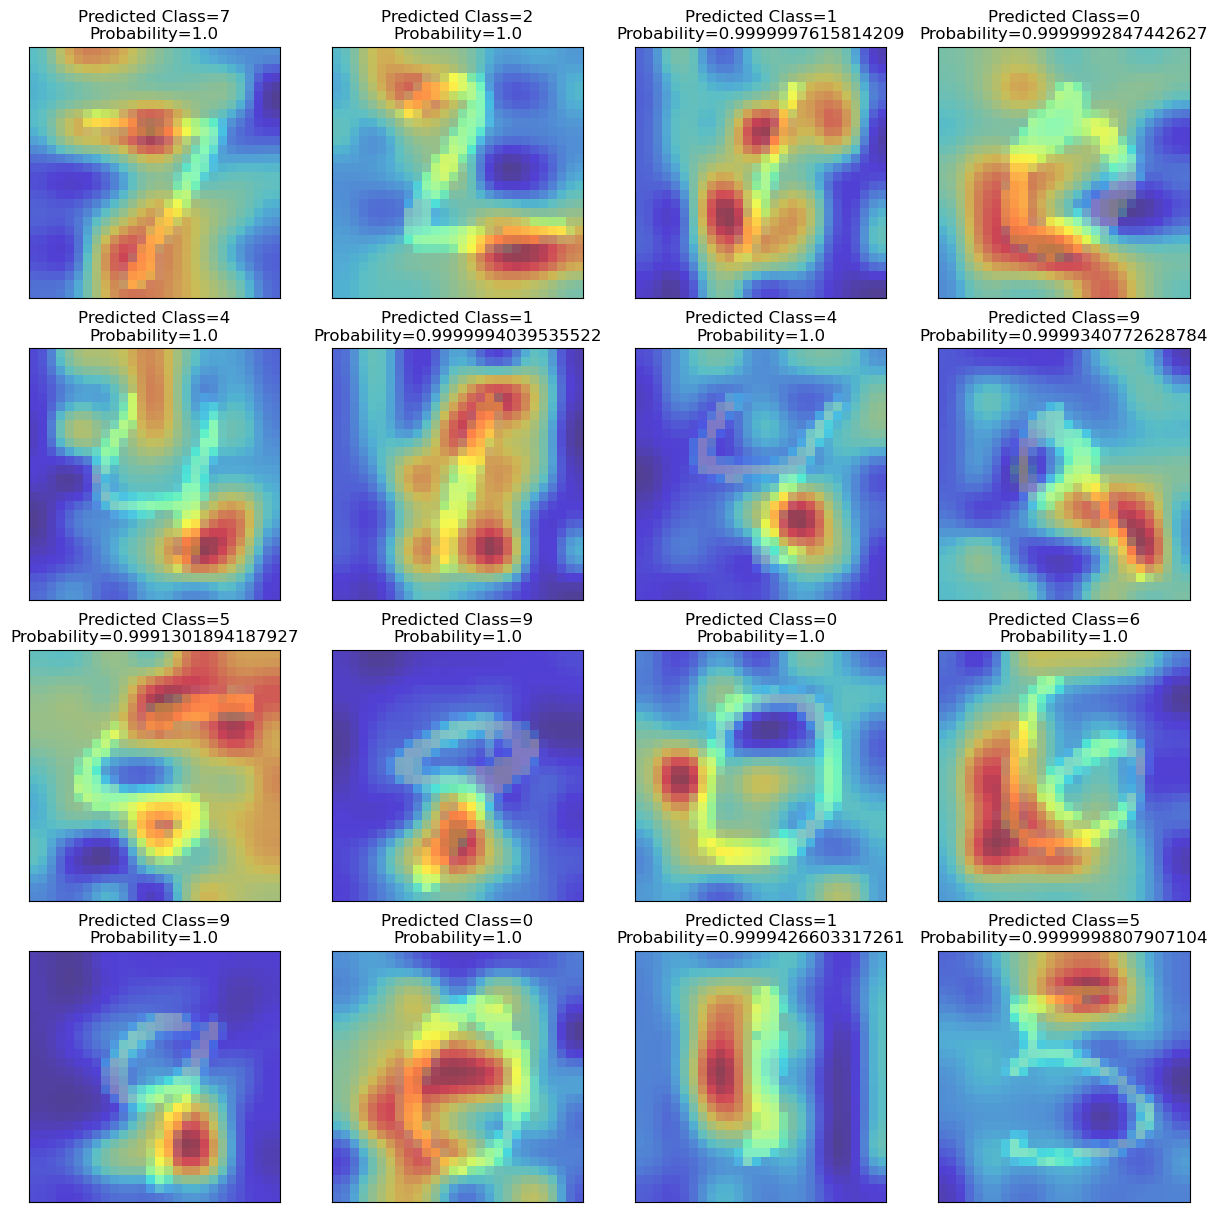

In [73]:
fig,axes=plt.subplots(4,4,figsize=(15,15))
"""
enumerate(axes.flat) is used to iterate over the 2D array of axes (subplots). 
axes.flat is a flattened version of the 2D array, so it becomes a 1D iterable.

ax_idx will contain the index of the current subplot, and ax will contain the 
reference to the subplot itself.

"""

for ax_idx, ax in enumerate(axes.flat):
    #subplot을 반복하면서(in a 2D grid) retrieve index(ax_idx) and axis(ax)
    
    features_for_img = features[ax_idx,:,:,:] #features에서 extract, 4D
    prediction=np.argmax(results[ax_idx])
    class_activation_weights= gap_weights[:,prediction]
    #gets predicted class and extract weight(last dense layer)
    class_activation_features= scipy.ndimage.zoom(features_for_img,(28/7,28/7,1),order=2)
    # order=2 > bicubic interpolation
    cam_output=np.dot(class_activation_features, class_activation_weights)
    #dot product
    ax.set_title('Predicted Class={}\nProbability={}'.format(prediction,results[ax_idx,prediction]))
    ax.imshow(np.squeeze(test_x[ax_idx],-1),alpha=0.5)
    #display the original input image with reduced opacity 0.5
    ax.imshow(cam_output,alpha=0.5,cmap=plt.cm.jet)
    # overlay on top of the input image
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) # x,y axis 숨기기
    print(cam_output.shape)
    print(class_activation_features.shape)


In [72]:
print((np.argmax(results[ax_idx]).shape)

SyntaxError: unexpected EOF while parsing (755503842.py, line 1)